Лабораторна робота №2
Варіант 2

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from sklearn.tree import plot_tree
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [31]:
# dataset = pd.read_csv("data.csv")
# dataset.columns = [c.strip().replace(' ', '_') for c in dataset.columns]

# X = dataset.drop('Bankrupt?', axis=1)
# X = dataset.drop('Net_Income_Flag', axis=1)
# Y = dataset['Bankrupt?']

df = sns.load_dataset('iris')
print(df.info)
X = df.drop('species', axis = 1)
Y = df['species']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.15, random_state = 42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.176, random_state = 42)

<bound method DataFrame.info of      sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]>


In [32]:
def normalize(data):
    columnMean = np.mean(data)
    columnStd = np.std(data)
    return (data - columnMean) / columnStd, columnMean, columnStd

In [33]:
means, stds = [], []
for column in x_train.columns:
    x_train[column], mean, std = normalize(x_train[column])
    means.append(mean)
    stds.append(std)


In [34]:
i = 0
for col in x_val.columns:
    x_val[col] = (x_val[col] - means[i]) / stds[i]
    i += 1

i = 0
for col in x_test.columns:
    x_test[col] = (x_test[col] - means[i]) / stds[i]
    i += 1

In [35]:
tree1 = DecisionTreeClassifier(max_depth = 1, random_state = 13)
tree1.fit(x_train, y_train)

tree2 = DecisionTreeClassifier(max_depth= 3, random_state = 13)
tree2.fit(x_train, y_train)

tree3 = DecisionTreeClassifier(max_depth= 5, random_state= 13)
tree3.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=13)

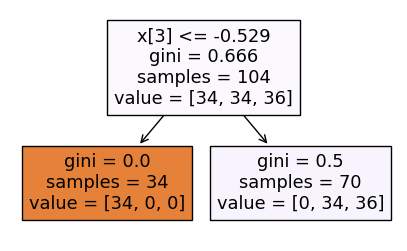

In [36]:
fig = plt.figure(figsize= (5, 3))
plot_tree(tree1, filled = True)
plt.show()

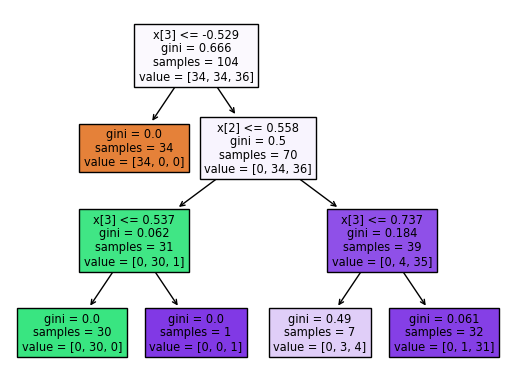

In [37]:
plot_tree(tree2, filled = True)
plt.show()

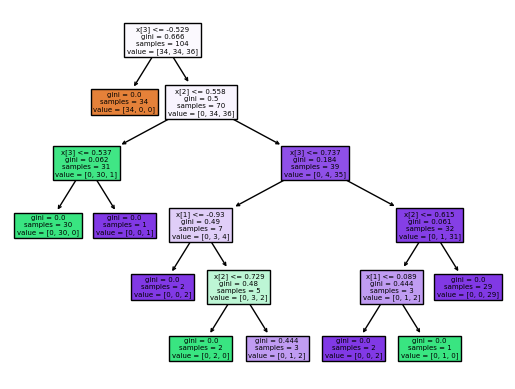

In [38]:
plot_tree(tree3, filled = True)
plt.show()

In [39]:
predicted1 = tree1.predict(x_val)
accuracy1 = accuracy_score(predicted1, y_val)
print(f'Accuracy tree depth 1 val_data: {accuracy1}')

predicted2 = tree2.predict(x_val)
accuracy2 = accuracy_score(predicted2, y_val)
print(f'Accuracy tree depth 2 val_data: {accuracy2}')

predicted3 = tree3.predict(x_val)
accuracy3 = accuracy_score(predicted3, y_val)
print(f'Accuracy tree depth 3 val_data: {accuracy3}')

print()
predicted1 = tree1.predict(x_test)
accuracy1 = accuracy_score(predicted1, y_test)
print(f'Accuracy tree depth 1: {accuracy1}')

predicted2 = tree2.predict(x_test)
accuracy2 = accuracy_score(predicted2, y_test)
print(f'Accuracy tree depth 2: {accuracy2}')

predicted3 = tree3.predict(x_test)
accuracy3 = accuracy_score(predicted3, y_test)
print(f'Accuracy tree depth 3: {accuracy3}')


Accuracy tree depth 1 val_data: 0.6956521739130435
Accuracy tree depth 2 val_data: 0.9130434782608695
Accuracy tree depth 3 val_data: 0.9130434782608695

Accuracy tree depth 1: 0.6086956521739131
Accuracy tree depth 2: 0.9130434782608695
Accuracy tree depth 3: 0.9565217391304348


In [40]:
np.random.seed(42)  
noise = np.random.uniform(-0.1, 0.1, x_train.shape)
x_train_noisy = x_train + noise

tree1_noisy = DecisionTreeClassifier(max_depth = 1, random_state = 13)
tree1_noisy.fit(x_train_noisy, y_train)

tree2_noisy = DecisionTreeClassifier(max_depth = 3, random_state = 13)
tree2_noisy.fit(x_train_noisy, y_train)

tree3_noisy = DecisionTreeClassifier(max_depth = 5, random_state = 13)
tree3_noisy.fit(x_train_noisy, y_train)

DecisionTreeClassifier(max_depth=5, random_state=13)

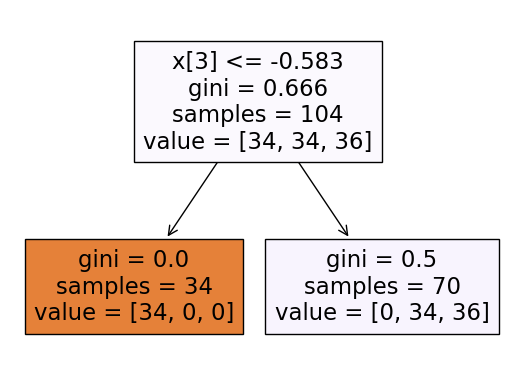

In [41]:
plot_tree(tree1_noisy, filled = True)
plt.show()

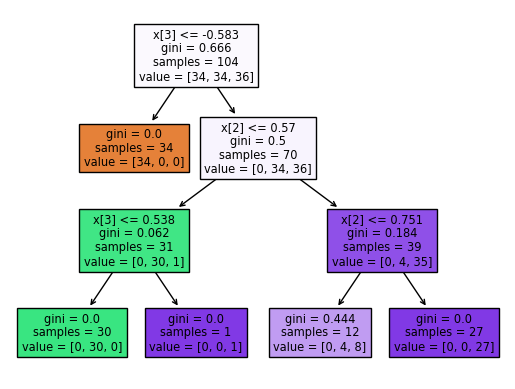

In [42]:
plot_tree(tree2_noisy, filled = True)
plt.show()

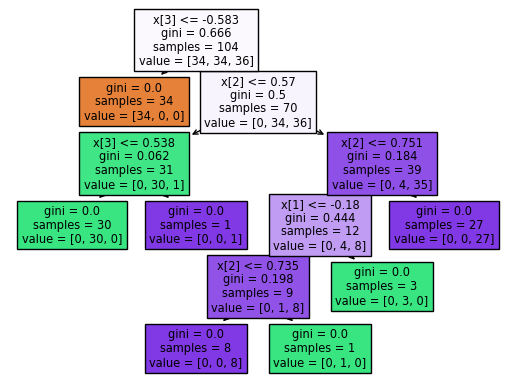

In [43]:
plot_tree(tree3_noisy, filled = True)
plt.show()

In [44]:
predicted1 = tree1_noisy.predict(x_val)
accuracy1 = accuracy_score(predicted1, y_val)
print(f'Accuracy tree depth 1 val_data: {accuracy1}')

predicted2 = tree2_noisy.predict(x_val)
accuracy2 = accuracy_score(predicted2, y_val)
print(f'Accuracy tree depth 2 val_data: {accuracy2}')

predicted3 = tree3_noisy.predict(x_val)
accuracy3 = accuracy_score(predicted3, y_val)
print(f'Accuracy tree depth 3 val_data: {accuracy3}')

print()
predicted1 = tree1_noisy.predict(x_test)
accuracy1 = accuracy_score(predicted1, y_test)
print(f'Accuracy tree depth 1 test_data: {accuracy1}')

predicted2 = tree2_noisy.predict(x_test)
accuracy2 = accuracy_score(predicted2, y_test)
print(f'Accuracy tree depth 2 test_data: {accuracy2}')

predicted3 = tree3_noisy.predict(x_test)
accuracy3 = accuracy_score(predicted3, y_test)
print(f'Accuracy tree depth 3 test_data: {accuracy3}')

Accuracy tree depth 1 val_data: 0.6956521739130435
Accuracy tree depth 2 val_data: 0.9565217391304348
Accuracy tree depth 3 val_data: 0.9565217391304348

Accuracy tree depth 1 test_data: 0.6086956521739131
Accuracy tree depth 2 test_data: 0.9565217391304348
Accuracy tree depth 3 test_data: 0.9130434782608695


In [45]:
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train)

pca_noisy = PCA(n_components=2)
x_train_noisy_pca = pca_noisy.fit_transform(x_train_noisy)

Text(0.5, 1.0, 'Original Data PCA Components')

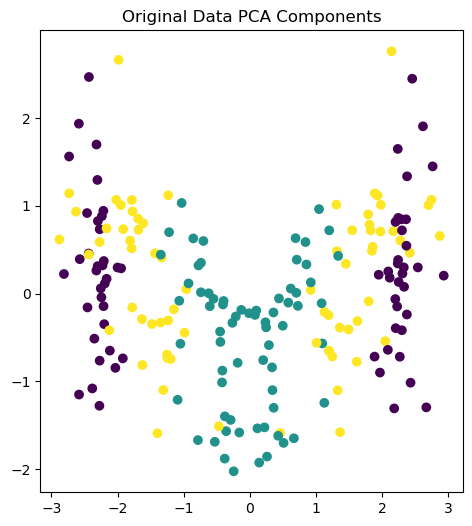

In [46]:
label = LabelEncoder()
y_label = label.fit_transform(y_train)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_label)
plt.title('Original Data PCA Components')

plt.subplot(1, 2, 1)
plt.scatter(x_train_noisy_pca[:, 0], x_train_noisy_pca[:, 1], c=y_label)
plt.title('Original Data PCA Components')

In [47]:
pca_reconstruction = PCA(n_components=0.95)
x_train_noisy_pca_reduced = pca_reconstruction.fit_transform(x_train_noisy)
x_train_noisy_pca_reconstructed = pca_reconstruction.inverse_transform(x_train_noisy_pca_reduced)

Text(0.5, 1.0, 'Denoised Data using PCA')

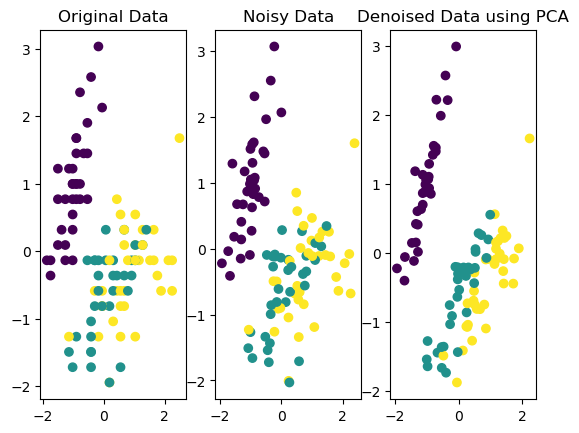

In [48]:
plt.subplot(1, 3, 1)
plt.scatter(x_train.values[:, 0], x_train.values[:, 1], c=y_label)
plt.title('Original Data')

plt.subplot(1, 3, 2)
plt.scatter(x_train_noisy.values[:, 0], x_train_noisy.values[:, 1], c=y_label)
plt.title('Noisy Data')

plt.subplot(1, 3, 3)
plt.scatter(x_train_noisy_pca_reconstructed[:, 0], x_train_noisy_pca_reconstructed[:, 1], c=y_label)
plt.title('Denoised Data using PCA')


/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


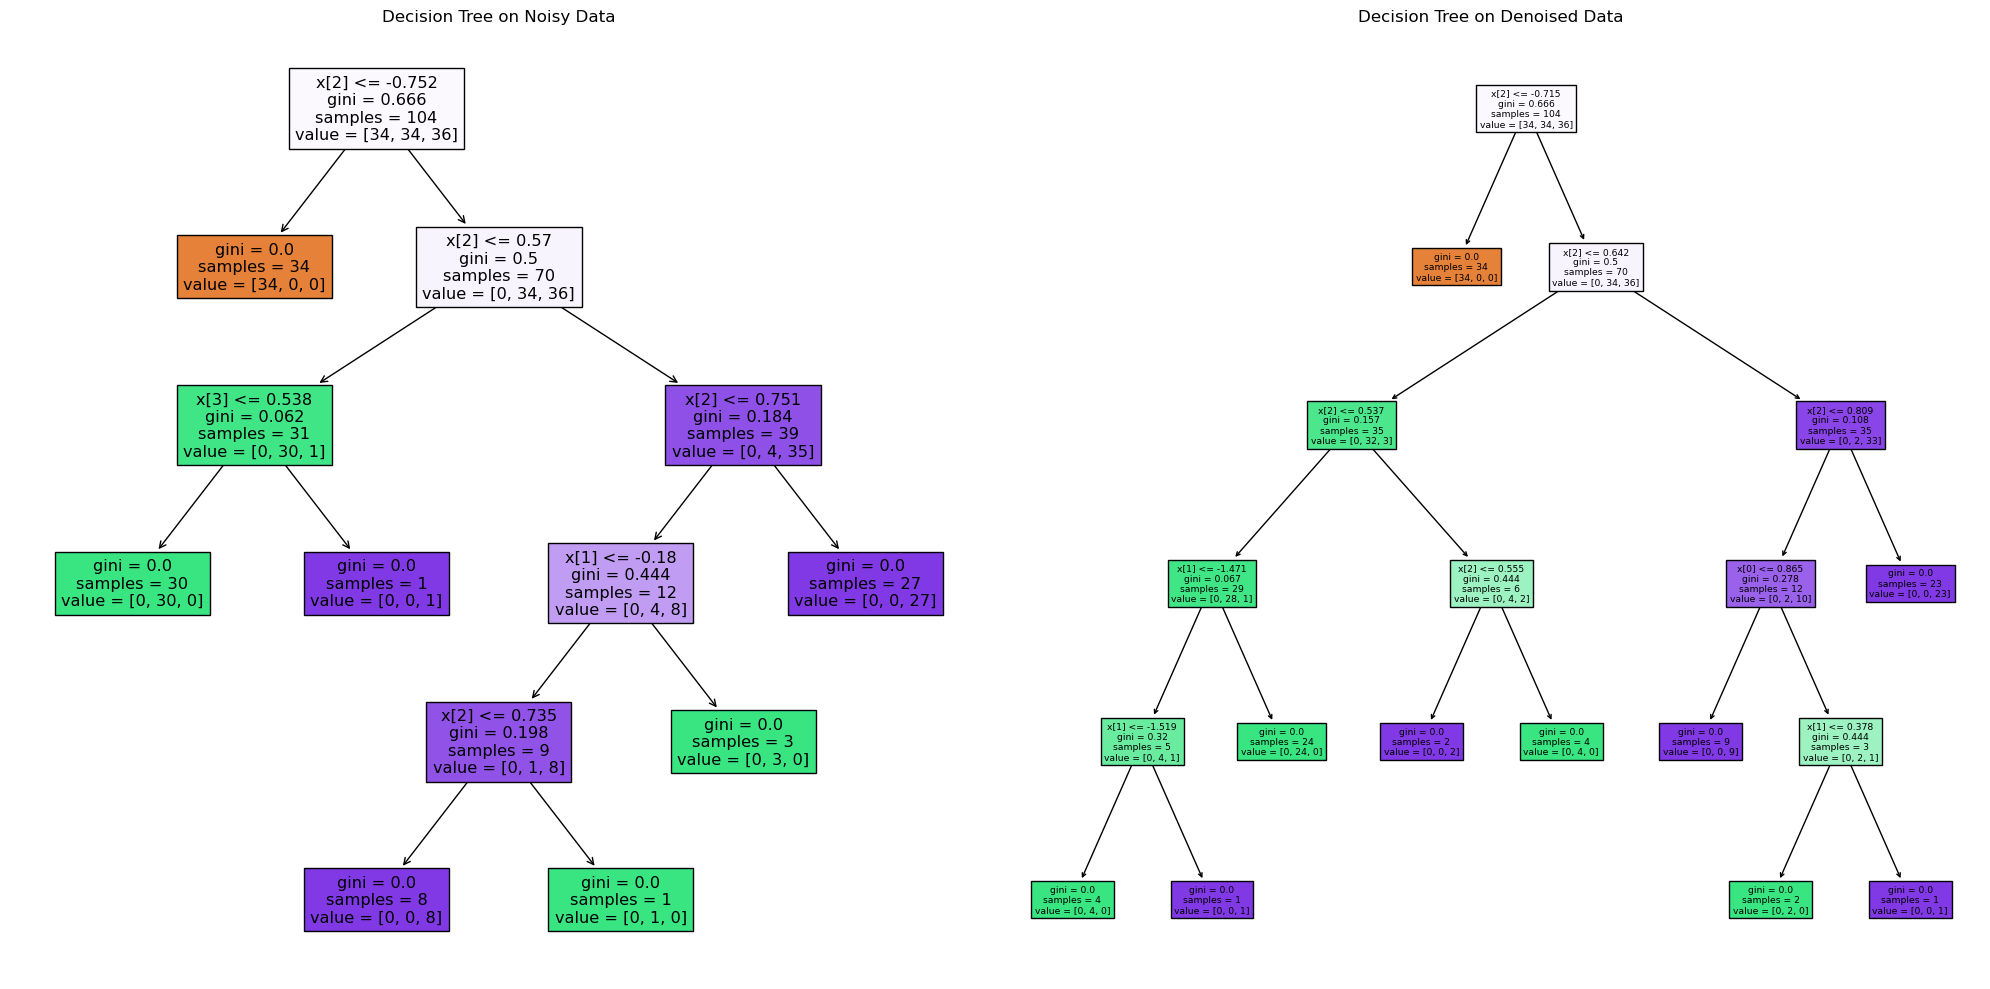

(0.9565217391304348,
 0.9130434782608695,
 0.9565217391304348,
 0.9565217391304348)

In [49]:
tree_noisy = DecisionTreeClassifier(max_depth= 5, random_state=42).fit(x_train_noisy, y_train)
tree_denoised = DecisionTreeClassifier(max_depth= 5, random_state=42).fit(x_train_noisy_pca_reconstructed, y_train)

val_accuracy_noisy = accuracy_score(y_val, tree_noisy.predict(x_val))
val_accuracy_denoised = accuracy_score(y_val, tree_denoised.predict(x_val))

test_accuracy_noisy = accuracy_score(y_test, tree_noisy.predict(x_test))
test_accuracy_denoised = accuracy_score(y_test, tree_denoised.predict(x_test))

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
plot_tree(tree_noisy, filled=True, ax=axes[0])
axes[0].set_title('Decision Tree on Noisy Data')
plot_tree(tree_denoised, filled=True, ax=axes[1])
axes[1].set_title('Decision Tree on Denoised Data')

plt.tight_layout()
plt.show()

(val_accuracy_noisy, test_accuracy_noisy, val_accuracy_denoised, test_accuracy_denoised)